In [50]:
import dropbox
import datetime
import schedule
import numpy as np
import string
import requests

from threading import Timer
import time
import sys

import csv


import math
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

import matplotlib.dates as mdate

from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter


In [2]:
class HR_Getting:
    def __init__():
        self.dbx = dropbox.Dropbox('lY_d3DAmzgAAAAAAAAAAdn7IAKZUPyYJXhaYmllRlCFZwhYgt_m6fNafXq8DcgWK')
        self.delta = datetime.timedelta(minutes = 1)
        
    def E4():
        # Dropbox access token    
        dbx = dropbox.Dropbox('lY_d3DAmzgAAAAAAAAAAdn7IAKZUPyYJXhaYmllRlCFZwhYgt_m6fNafXq8DcgWK')

        # current time
        timestamp = datetime.datetime.now()
        # time gap
        delta = datetime.timedelta(minutes = 1)
        # time where the IBI file has been bulit
        filetime = timestamp - delta

        # Re-formatting: datetime->String
        Str_filetime = filetime.strftime('%Y-%m-%d-%H-%M')

        # For testing only 
        # Str_filetime = '2019-06-22-22-25'

        # Set parameters for downloading the file 
        # Saving path
        download_path = 'C:\\FINAL_PROJECT\\IBI_Files\\IBIData'+Str_filetime +'.txt'
        # File location in dropbox    
        path = '/IBI/IBIData'+Str_filetime+'.txt'

        # try download
        try:
            dbx.files_download_to_file(download_path,path,None)   
        except:
                print('IBIData'+Str_filetime+'.txt current is not exsit')
                pass
        else:
            print("Successful Downloading /Apps/E4Link" + path + " from Dropbox, overwriting " + download_path + "...")

            # A file downloaded, reformat the file
            resval = numpy.loadtxt(download_path)

            with open(download_path, 'r', encoding='utf-8') as f:
                lines = f.readlines()# read the content
                for i in range(0,lines.__len__(),1): #(start/left bond, end/right bond, step length) 
                    list = []  # empty list for storing the data
                    for value in lines[i].split():
                        value=value.strip(string.whitespace)
                        list.append(float(value))

            # calculate the heart beat rate
            sum = 0

            for i in range(len(list)):
                sum += list[i]       # sum of the list

            aveIBI = sum / len(list)

            # Calculate the heart beat rate     
            bpm = int(60/aveIBI)
            
            with open('bpm_data.csv','a',newline='') as f:
                csv_write = csv.writer(f)
                csv_write.writerow([Str_filetime,bpm])
                f.close()
                

            print('The average IBI value(s):',aveIBI,'\n'+'The heart beat rate(bpm):',bpm,'\n' )

    def bodyE4():
        schedule.every(1).minutes.do(HR_Getting.E4)
        while True:
            schedule.run_pending()
            
if __name__ == "__main__":

    HR_E4file = HR_Getting.bodyE4()
    print ('here')


Successful Downloading /Apps/E4Link/IBI/IBIData2019-07-26-22-16.txt from Dropbox, overwriting C:\FINAL_PROJECT\IBI_Files\IBIData2019-07-26-22-16.txt...
The average IBI value(s): 0.920131414 
The heart beat rate(bpm): 65 

Successful Downloading /Apps/E4Link/IBI/IBIData2019-07-26-22-17.txt from Dropbox, overwriting C:\FINAL_PROJECT\IBI_Files\IBIData2019-07-26-22-17.txt...
The average IBI value(s): 0.7766899735294119 
The heart beat rate(bpm): 77 

Successful Downloading /Apps/E4Link/IBI/IBIData2019-07-26-22-18.txt from Dropbox, overwriting C:\FINAL_PROJECT\IBI_Files\IBIData2019-07-26-22-18.txt...
The average IBI value(s): 0.8229543366666666 
The heart beat rate(bpm): 72 

Successful Downloading /Apps/E4Link/IBI/IBIData2019-07-26-22-20.txt from Dropbox, overwriting C:\FINAL_PROJECT\IBI_Files\IBIData2019-07-26-22-20.txt...
The average IBI value(s): 0.9375429158620691 
The heart beat rate(bpm): 63 

Successful Downloading /Apps/E4Link/IBI/IBIData2019-07-26-22-21.txt from Dropbox, overwriti

KeyboardInterrupt: 

('2019-07-26-21-02', '2019-07-26-21-03', '2019-07-26-21-04', '2019-07-26-21-05', '2019-07-26-21-06', '2019-07-26-21-07', '2019-07-26-21-08', '2019-07-26-21-09', '2019-07-26-21-10', '2019-07-26-21-11', '2019-07-26-21-12', '2019-07-26-21-13', '2019-07-26-21-14', '2019-07-26-21-15', '2019-07-26-21-16', '2019-07-26-21-17', '2019-07-26-21-18', '2019-07-26-21-19', '2019-07-26-22-10', '2019-07-26-22-10', '2019-07-26-22-11', '2019-07-26-22-11', '2019-07-26-22-11', '2019-07-26-22-12', '2019-07-26-22-12', '2019-07-26-22-12', '2019-07-26-22-13', '2019-07-26-22-13', '2019-07-26-22-13', '2019-07-26-22-13', '2019-07-26-22-15', '2019-07-26-22-15', '2019-07-26-22-15', '2019-07-26-22-15', '2019-07-26-22-16', '2019-07-26-22-17', '2019-07-26-22-18', '2019-07-26-22-20', '2019-07-26-22-21', '2019-07-26-22-22', '2019-07-26-22-23', '2019-07-26-22-25')


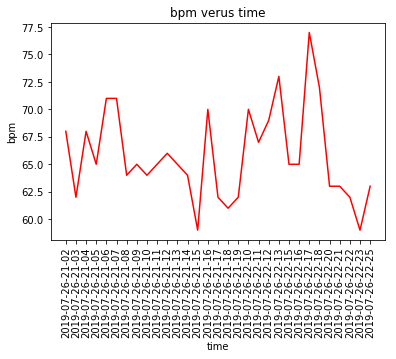

In [65]:
x = []
y = []
plt.ion()
plt.figure(1)
plt.clf()

date2num = mdate.strpdate2num('%Y-%m-%d-%H-%M')

with open('bpm_data.csv','r') as bpmcsv:
    reader = csv.reader(bpmcsv)
    for row in reader:

        x.append(row[0])
        y.append(int(row[1]))
    
    print(tuple(x_ticks))
    

plt.plot(tuple(x),y,'-r')
plt.tick_params(axis ='x', rotation =90) 
plt.title('bpm verus time')
plt.xlabel('time')
plt.ylabel('bpm')

plt.draw()
plt.show()
